In [6]:
from datasets import load_dataset
from collections import Counter
from tqdm import tqdm

In [30]:
ood_data = load_dataset("cc_news")
ood_data_less_than = ood_data["train"].filter(lambda x: len(x["text"]) < 1024)
# filter duplicate


Filter: 100%|██████████| 708241/708241 [00:07<00:00, 94710.83 examples/s] 


In [31]:
# Save as ./ood/ood_cc_news.txt
ood_data_less_than = ood_data_less_than["text"]
ood_data_less_than = list(set(ood_data_less_than))

with open("./ood/ood_cc_news.txt", "w") as f:
    for item in tqdm(ood_data_less_than):
        f.write(item + "\n")
    f.close()

100%|██████████| 168418/168418 [00:00<00:00, 660422.31it/s]


In [32]:
# count the number of words in each sentence
sent_length = Counter([len(x.split()) for x in tqdm(ood_data["train"]["text"])])

  1%|          | 6069/708241 [00:00<00:11, 60681.38it/s]

100%|██████████| 708241/708241 [00:13<00:00, 53844.12it/s]


<BarContainer object of 485 artists>

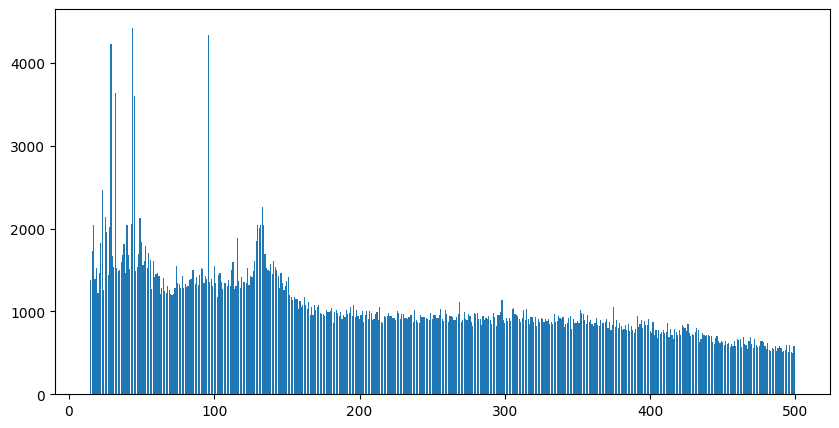

In [18]:
# draw the histogram
from matplotlib import pyplot as plt
import numpy as np

sent_length = dict({k: v for k, v in sent_length.items() if k < 500})
plt.figure(figsize=(10, 5))
plt.bar(sent_length.keys(), sent_length.values())

In [19]:
sum(sent_length.values())

516726